In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

<AxesSubplot:>

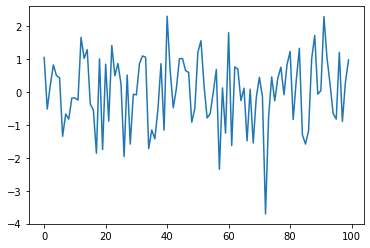

In [3]:
df.Stationary.plot()

<AxesSubplot:>

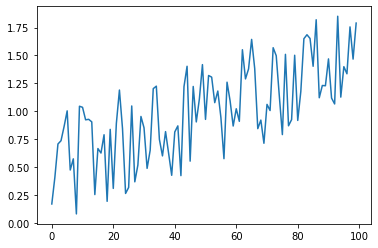

In [4]:
df.Nonstationary.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
# Store the results of the test in the variable result
result = adfuller(df.Stationary)
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -9.806544
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.498198082189098)
('5%', -2.891208211860468)
('10%', -2.5825959973472097)


In [6]:
# Store the results of the test in the variable result
result = adfuller(df.Nonstationary)
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -0.196600
p-value:        0.938926 
Lags used:      10
Critical Values:
('1%', -3.506057133647011)
('5%', -2.8946066061911946)
('10%', -2.5844100201994697)


# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [7]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:>

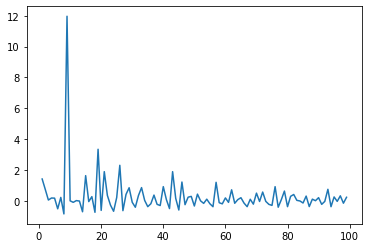

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:>

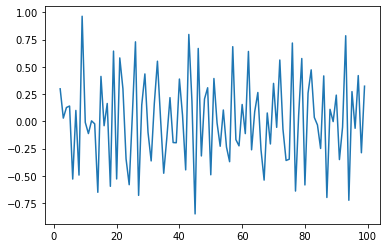

In [12]:
# Plot the 
df.Diff.plot()